# 1. Netflix


TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [158]:
import opendatasets as od
#od.download(dataset_url)

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = '/kaggle/input/netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/anivorlis/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

Explore the dataset



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
df.shape

(6234, 12)

In [14]:
# How many NaN are in the data for each column
df.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
# Replace NaN in director, cast and country with Unknown
df.director.fillna('Unknown', inplace=True)
df.cast.fillna('Unknown', inplace=True)
df.country.fillna('Unknown', inplace=True)

In [16]:
# Drop the remaining NaN
df.dropna(how='any', inplace=True)

In [17]:
df.shape

(6214, 12)

In [18]:
import jovian

In [19]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/anivorlis/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0, 0.5, 'Count')

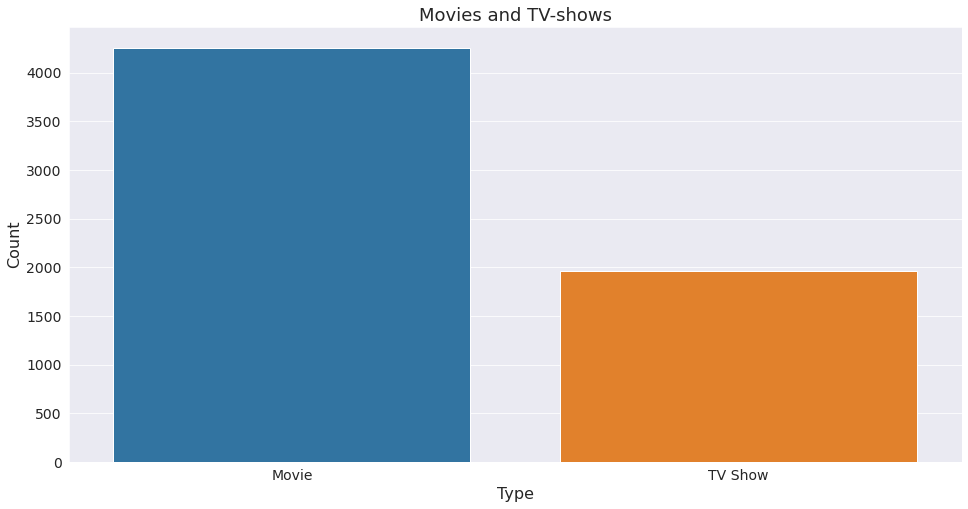

In [39]:
# How many movies vs shows
ax = sns.countplot(x='type', data=df)
ax.set_title('Movies and TV-shows', size=18)
ax.set_xlabel('Type', size=16)
ax.set_ylabel('Count', size=16)

Text(0, 0.5, 'Count')

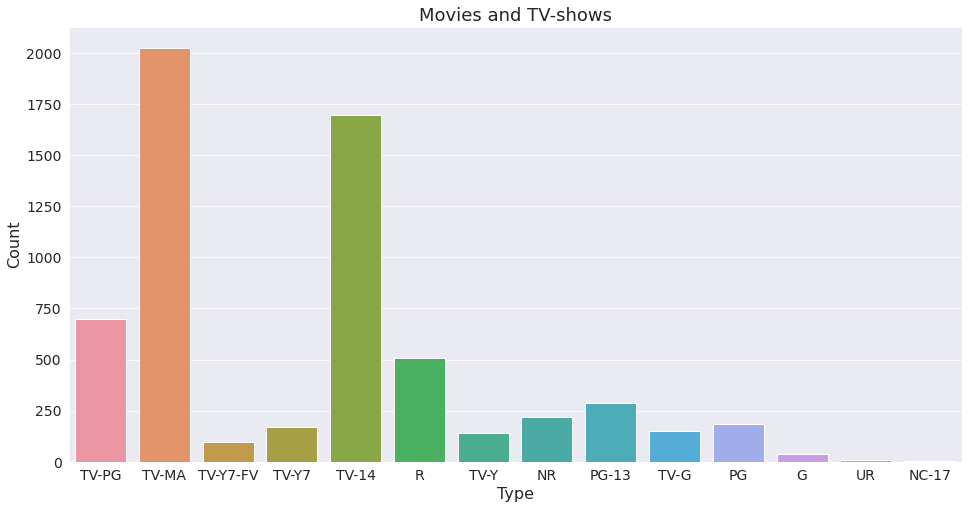

In [40]:
# How is the ratings
ax = sns.countplot(x='rating', data=df)
ax.set_title('Movies and TV-shows', size=18)
ax.set_xlabel('Type', size=16)
ax.set_ylabel('Count', size=16)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

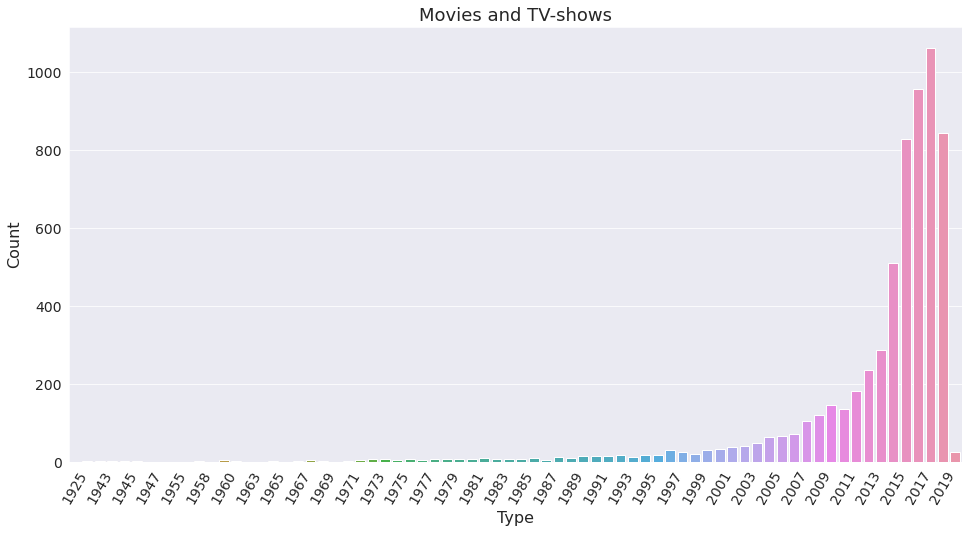

In [108]:
# per year
ax = sns.countplot(x='release_year', data=df)
ax.set_title('Movies and TV-shows', size=18)
ax.set_xlabel('Type', size=16)
ax.set_ylabel('Count', size=16)
plt.xticks(rotation=60)

# Show ticks every 10 data point
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 2nd label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [76]:
# Maximum and minimum duration of movies
print(df[df.type=='Movie'].duration.min())
print(df[df.type=='Movie'].duration.max())

10 min
99 min


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [77]:
# Maximum and minimum duration of movies
print(df[df.type=='TV Show'].duration.min())
print(df[df.type=='TV Show'].duration.max())

1 Season
9 Seasons


This is obvisouly wrong because the duration is stored with strings instead of numbers.

In [ ]:
import jovian

In [75]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/anivorlis/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

In [ ]:
# Lets fix the duration and convert it from string to numbers

In [ ]:
# Replace str in duration with integers
# Minutes for shows and number of season for series

# First define a function that reads a string and return the initial suffix before the space
def filter_duration(string):
    return int(string.split(' ')[0])

# This is how the function works
print(filter_duration('30 min'))
print(filter_duration('1 Season'))

In [ ]:
# Let's apply the function to the dataframe and cast to int
df['duration_number'] = df.duration.apply(filter_duration)

In [81]:
# Maximum and minimum duration of movies
print(df[df.type=='Movie'].duration_number.min())
print(df[df.type=='Movie'].duration_number.max())

3
312


In [83]:
# Maximum and minimum duration of movies
print(df[df.type=='TV Show'].duration_number.min())
print(df[df.type=='TV Show'].duration_number.max())

1
15


#### Q2: TODO - ask a question here and answer it below

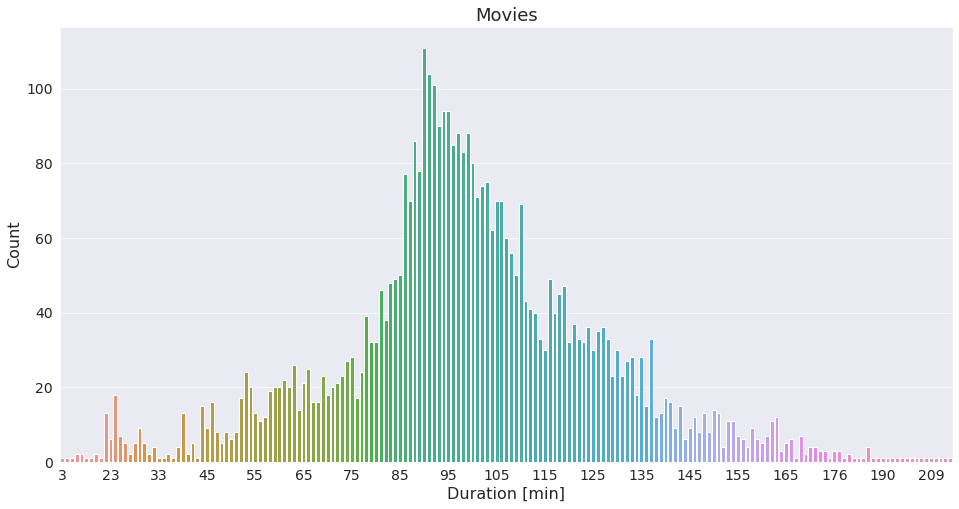

In [96]:
# Let's see movies by duration and TV shows by seasons
ax = sns.countplot(x='duration_number', data=df[df.type=='Movie'])
ax.set_title('Movies', size=18)
ax.set_xlabel('Duration [min]', size=16)
ax.set_ylabel('Count', size=16)

# Show ticks every 10 data point
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Text(0, 0.5, 'Count')

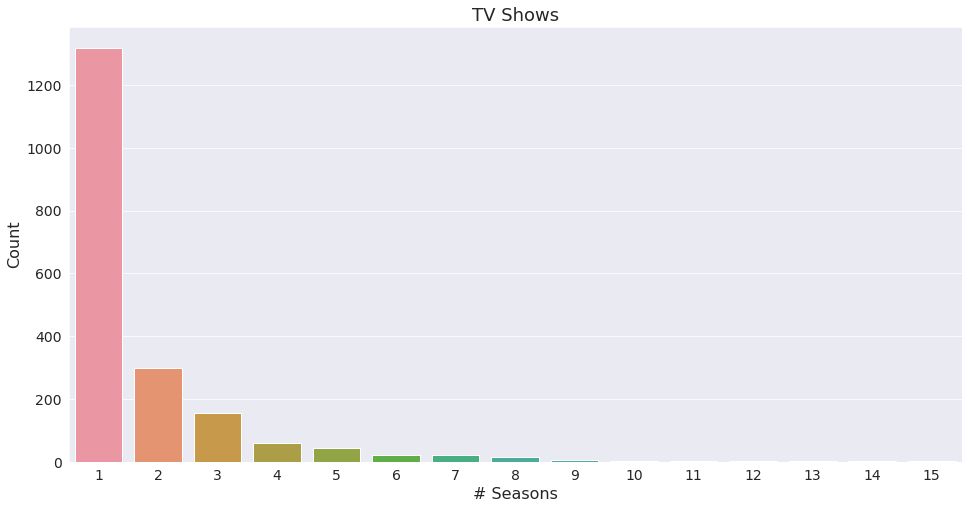

In [104]:
# Let's see TV shows by duration and TV shows by seasons
ax = sns.countplot(x='duration_number', data=df[df.type=='TV Show'])
ax.set_title('TV Shows', size=18)
ax.set_xlabel('# Seasons', size=16)
ax.set_ylabel('Count', size=16)

#### Q3: TODO - ask a question here and answer it below

## Count the movies by genre. I had trouble with that since some movies belong in different genres and this is some solution that I found online. 

It uses a Counter to count the movies by genre and then plots the results, very interesting.

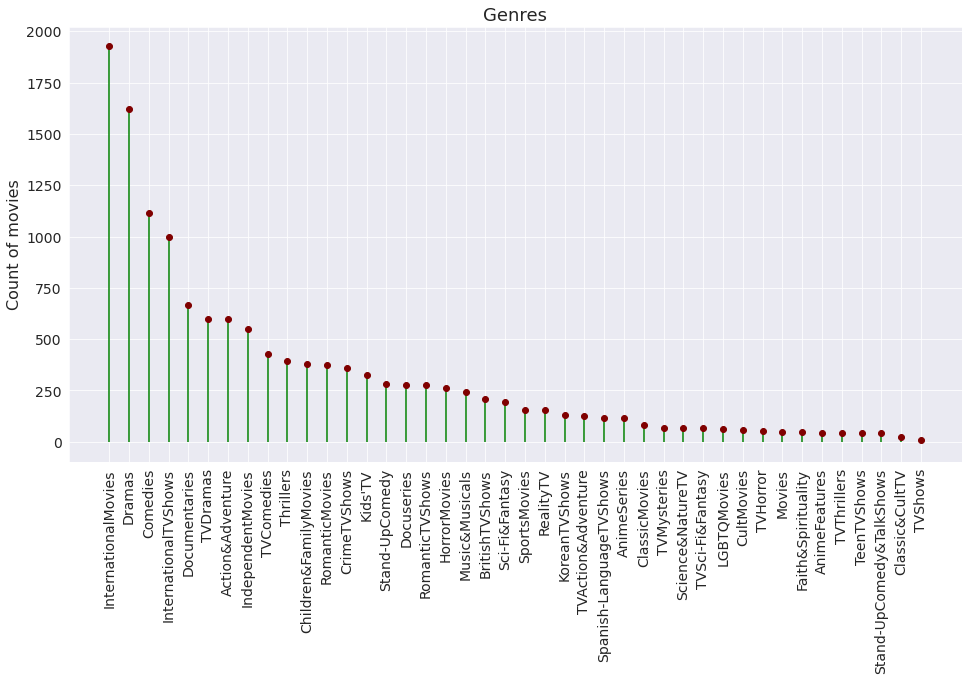

<Figure size 720x720 with 0 Axes>

In [149]:
from collections import Counter

genres=list(df['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies", size=16)
# set a title
ax.set_title("Genres", size=18);

#### Q4: TODO - ask a question here and answer it below

Text(0, 0.5, 'Title')

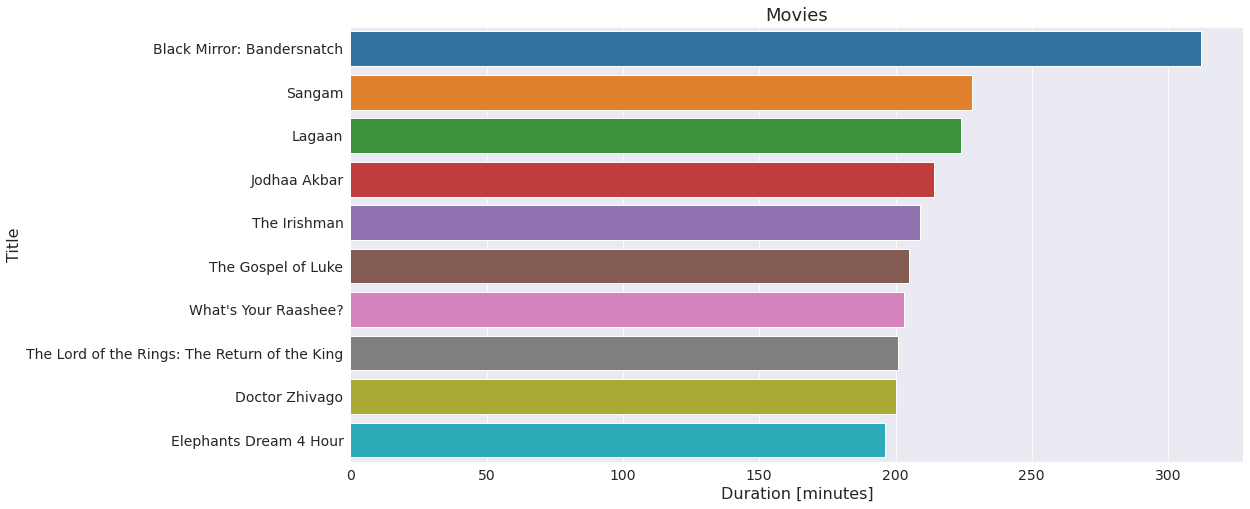

In [152]:
# Find and plot the 10 movies with the longest duration
long_movies = df[df.type=='Movie'].sort_values('duration_number', ascending=False).head(10)
ax = sns.barplot(x=long_movies.duration_number, y=long_movies.title)

ax.set_title('Movies', size=18)
ax.set_xlabel('Duration [minutes]', size=16)
ax.set_ylabel('Title', size=16)

Let us save and upload our work to Jovian before continuing.

In [153]:
import jovian

In [155]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/anivorlis/zerotopandas-course-project


<IPython.core.display.Javascript object>

## Inferences and Conclusion

It was very interesting to work on a dataset that is so much different that the ones I usually work with. The convertion from string to integer for the duration was challenging and I am happy that I solved it by defining a custom function. 

Also, it was a challenge to count the movies by genre, since some movies had multiple genres associated with them. After some thinking I came up with a solution using a predifined dictionary but it wasn't very elegant and then after searching I found a solution that used the Counter instead. Very elegant and something very useful for the future. 

In [ ]:
import jovian

In [159]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/anivorlis/zerotopandas-course-project


<IPython.core.display.Javascript object>